#### visualize mfcc

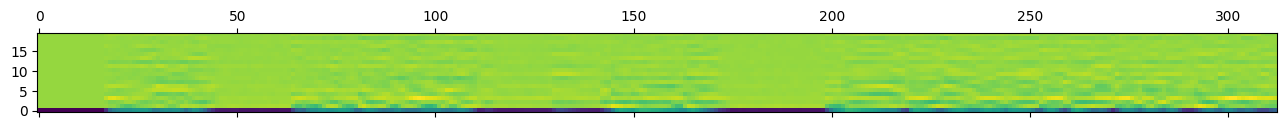

In [5]:
import librosa

audio = "resampled_audio.wav"

waveform, sample_rate = librosa.load(audio, sr=None)

features = librosa.feature.mfcc(y=waveform, sr=sample_rate)

import matplotlib.pyplot as plt
plt.matshow(features, origin="lower")
plt.show()

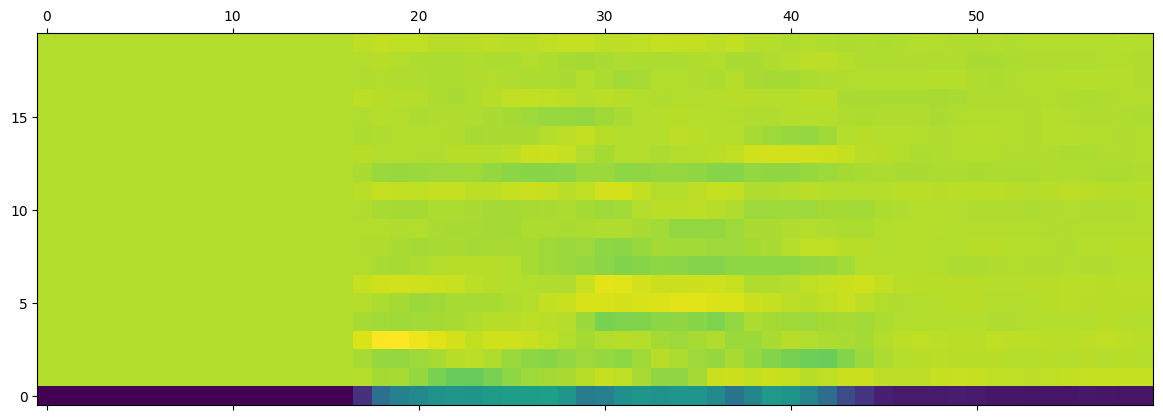

In [8]:
features2 = features[:, :60]
plt.matshow(features2, origin="lower")
plt.show()

#### how to resample audio file

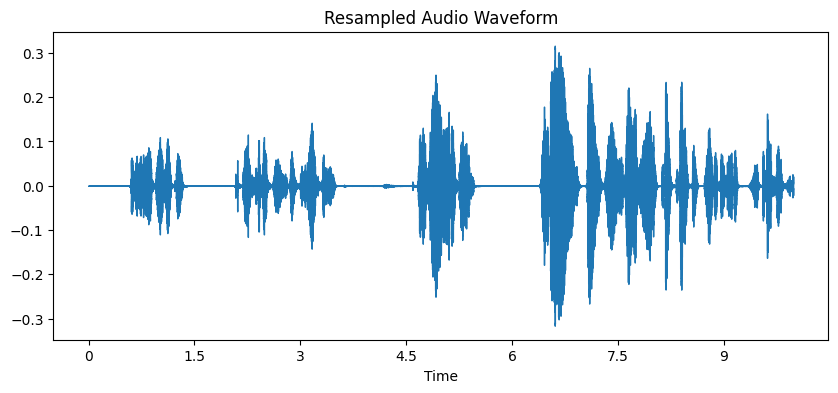

In [9]:
import librosa
import librosa.display
import soundfile as sf

# Load the audio file
audio_file = 'audio/chunks/recorded_audio_20230819_231924.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_file, sr=None)  # Load the audio without resampling

# Resample to 16,000 Hz
target_sr = 16000
y_resampled = librosa.resample(y=y, orig_sr=sr, target_sr=target_sr)

# Save the resampled audio to a new file
#output_file = 'resampled_audio.wav'  # Replace with the desired output file path
#sf.write(output_file, y_resampled, target_sr)

# Visualize the waveform of the resampled audio (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_resampled, sr=target_sr)
plt.title('Resampled Audio Waveform')
plt.show()


#### Gaussian mixture model

In [2]:
import sklearn 
from sklearn.mixture import GaussianMixture
import pickle

In [7]:
samples = any
with open('speaker_recognition_studies/data.pickle', mode='rb') as f:
    samples = pickle.load(f)

samples.shape

gmm = GaussianMixture(n_components=3, covariance_type='diag')

gmm.fit(samples)


GaussianMixture(covariance_type='diag', n_components=3)

In [11]:

print(f"weights: {gmm.weights_}, \n mean: {gmm.means_}, \n coveriance: {gmm.covariances_}")

weights: [0.19467128 0.30294627 0.50238245], 
 mean: [[ 0.99882637 -2.24519556  1.184155  ]
 [ 5.39438472  3.29984342 -1.72191592]
 [-4.0008411   2.28581451 -1.98620539]], 
 coveriance: [[0.10106389 2.15896663 3.09492935]
 [1.1834712  0.10140878 1.81908452]
 [1.53582224 1.2249994  0.58870923]]


#### diarization ?

In [ ]:
from pyAudioAnalysis import audioSegmentation as aS

# Load the audio file
audio_file = "resampled_audio.wav"

# Perform unsupervised speaker diarization
flagsInd, classesAll = aS.speaker_diarization(audio_file, 0)

speakers = []

# Save each speaker's array in a separate file
for i in range(len(classesAll)):
    start = flagsInd[i][0]
    end = flagsInd[i][1]
    speaker = classesAll[i]
    segment_file = f"{speaker}_{start}_{end}.wav"
    speakers.append(segment_file)
    #aS.crop_audio(audio_file, start, end, segment_file)

speakers

In [20]:
from pyAudioAnalysis import audioSegmentation
from pydub import AudioSegment
from pyAudioAnalysis import ShortTermFeatures
from sklearn.cluster import KMeans
from collections import defaultdict
import numpy as np

# Load the audio file
audio = AudioSegment.from_file("audio/chunks/recorded_audio_20230819_231924.wav")

# Convert to mono if it's in stereo
audio = audio.set_channels(1)

# Segment the entire audio into a single segment (since it's 10 seconds long)
segments = [audio]

# Initialize an empty feature list
features = []

for segment in segments:
    # Convert to numpy array
    audio_array = segment.get_array_of_samples()

    # Extract short-term features (e.g., MFCCs)
    mt_features, _ = ShortTermFeatures.feature_extraction(audio_array, 44100, 50, 25)

    # Append the features to the list
    features.append(mt_features)

# Convert the list of features to a 2D array
feature_matrix = np.vstack(features)

# Determine the number of clusters (you can experiment with different values)
num_clusters = 2

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(feature_matrix)

# Initialize a dictionary to store segments for each speaker
speakers = defaultdict(list)

for i, label in enumerate(cluster_labels):
    speakers[label].append(segments[i])

# Now you can process or visualize the results as needed


ValueError: shape mismatch: value array of shape (25,) could not be broadcast to indexing result of shape (24,)